In [45]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.integrate
from matplotlib.pyplot import figure

In [46]:
import sys
np.set_printoptions(threshold=sys.maxsize)

### Problem 1 

In [47]:
# Define the function
def rhsfunc(x, y, ep):
    f1 = y[1]
    f2 = (x**2 - ep) * y[0]
    
    return np.array([f1,f2])

In [48]:
# Define some constants 
K = 1
L = 4
ep_start = 0
tol = 10**(-6) 

xp = [-L, L]
x_evals = np.linspace(-L,L,20*L+1) 

In [49]:
ep = ep_start
dep = K/100 

In [50]:
# Define our initial conditions 
y0 = np.array([1,((K*L**2)-ep)**.5])

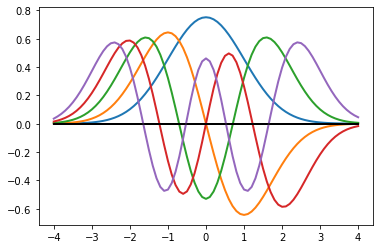

In [51]:
A6 = np.array([])
A = {}

for modes in range(5):
    ep = ep_start
    dep = K/100
    
    
    for j in range(1000): # using for loop to make sure it stops. 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhsfunc(x,y,ep), xp, y0, t_eval = x_evals)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2 
        
        # Normalize eigenfunction
        y_sol_norm = y_sol/(np.sqrt(scipy.integrate.trapz(y_sol**2, x_evals)))

        if np.abs(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) < tol:
#             print('We got the eigenvalue:', ep)
            A6 = np.append(A6, ep)
            break 

        if (-1)**(modes)*(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) > tol:
            ep = ep + dep # Increase 
        else: 
            ep = ep - dep/2 # Decrease 
            dep = dep/2 # Cut dep in half to make sure we converge 
    
    A[modes] = y_sol_norm
    
    ep_start = ep + 0.1
    

    plt.plot(sol.t, y_sol_norm, linewidth=2)
    plt.plot(sol.t, 0*sol.t, 'k')

In [52]:
A1 = np.abs(A[0].copy()).reshape(81,1)
A2 = np.abs(A[1].copy()).reshape(81,1)
A3 = np.abs(A[2].copy()).reshape(81,1)
A4 = np.abs(A[3].copy()).reshape(81,1)
A5 = np.abs(A[4].copy()).reshape(81,1)

In [53]:
A6 = A6.reshape(1,5)

### Problem 2

In [54]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.integrate
from matplotlib.pyplot import figure

In [55]:
# Define some constants 
K = 1
L = 4

xp = [-L, L]
x_evals = np.linspace(-L,L,20*L+1) 
deltax = x_evals[1] - x_evals[0]

In [56]:
Diagonal = np.array([])
for x in x_evals[1:80]:
#     d = (2/(deltax**2))+(K*(x**2))
    d = (2)+(K*(x**2)*deltax**2)
    Diagonal = np.append(Diagonal,d)
    
Upper = (-1)*np.ones(x_evals.shape[0]-3)
Lower = (-1)*np.ones(x_evals.shape[0]-3);
A = np.diag(Diagonal) + np.diag(Upper, 1) + np.diag(Lower, -1)
# A

In [57]:
# Changing left end point boundary conditions
A[0,0] = ((-4/3)+2) + (deltax**2*K*x_evals[1]**2)
A[0,1] = (1/3)-1

In [58]:
# # Changing right end point boundary conditions
A[78,-1] = ((-4/3)+2) + (deltax**2*K*x_evals[1]**2)
A[78,-2] = (1/3)-1

In [59]:
w, v = np.linalg.eig(A) 

### Eigenvalues

In [60]:
sort_id = np.argsort(w)

In [61]:
w = w[sort_id]

In [62]:
# Obtain the eigenvalues
A12 = np.abs(w[0:5])

In [63]:
A12 = A12/(deltax**2)

In [64]:
A12 = A12.reshape(1,5)

### Eigenfunctions

In [65]:
sort_id = np.argsort(w)

In [66]:
v = v[:,sort_id]

In [67]:
phi_0 = np.array([])

for n in range(0,v.shape[0]):
    k = (4*v[1,n] - v[0,n])/(3+(2*deltax*np.sqrt(K*L**2 - w[n])))
    phi_0 = np.append(phi_0,k)

In [68]:
phi_n = np.array([])

for n in range(0,v.shape[0]):
    m = (4*v[78,n] - v[77,n])/(3+(2*deltax*np.sqrt(K*L**2 - w[n])))
    phi_n = np.append(phi_n,m)

In [69]:
# Add phi_0 and phi_n to the matrix A
v = np.vstack((phi_0,v,phi_n))

In [70]:
# Select eigenfunctions
A7 = v[:,0]
A8 = v[:,1]
A9 = v[:,2]
A10 = v[:,3]
A11 = v[:,4]

In [71]:
# Normalizing 
A7 = np.abs(A7/(np.sqrt(scipy.integrate.trapz(A7**2, x_evals))))
A8 = np.abs(A8/(np.sqrt(scipy.integrate.trapz(A8**2, x_evals))))
A9 = np.abs(A9/(np.sqrt(scipy.integrate.trapz(A9**2, x_evals))))
A10 = np.abs(A10/(np.sqrt(scipy.integrate.trapz(A10**2, x_evals))))
A11 = np.abs(A11/(np.sqrt(scipy.integrate.trapz(A11**2, x_evals))))

In [72]:
A7 = A7.reshape(81,1)
A8 = A8.reshape(81,1)
A9 = A9.reshape(81,1)
A10 = A10.reshape(81,1)
A11 = A11.reshape(81,1)

### Problem 3

### 0.5

In [73]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.integrate
from matplotlib.pyplot import figure

In [74]:
# Define the function
def rhs_ivp(x, y, ep, gamma):
    f1 = y[1]
    f2 = ((gamma*np.abs(y[0])**2)+x**2 - ep) * y[0]
    
    return np.array([f1,f2])

In [75]:
# Define some constants 
K = 1
L = 3
ep_start = 0
tol = 10**(-5) 

xp = [-L, L]
x_span = np.linspace(-L,L,20*L+1) 
gamma = 0.5

ep = ep_start
dep = K/100

In [76]:
# Define our initial conditions 
A = 0.000001 # This will change
# y0 = np.array([A,(((gamma*(A**2) + (K*L**2) - ep))**.5)*(A**2)])
y0 = np.array([A,((((K*L**2) - ep))**.5)*(A)])

In [77]:
A15 = np.array([])
Eigenfunctions = {}

for modes in range(2):
    ep = ep_start
    dep = K/100
    
    for j in range(1000): # using for loop to make sure it stops. 
        # update initial condition
        y0 = np.array([A,((((K*L**2) - ep))**.5)*(A)])
        
        # solve ODE 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2
        
        # define/compute norm and boundary conditions 
        norm = np.abs(scipy.integrate.trapz(y_sol**2,x_span)) #norm
        norm_tol = np.abs(scipy.integrate.trapz(y_sol**2,x_span)-1)
        boundary = np.abs(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) # same bc as problem 1 and 2. 
#         boundary = np.abs(y_sol_dx[-1] + (((gamma*np.abs(y_sol[-1])**2)+(K*L**2)-ep)**.5)*y_sol[-1])
        
# Norm Shooting 
        
        #if norm and boundary condiiton met, break, else A = A/sqrt(norm)
        if boundary < tol and norm_tol < tol:
            break
        else:
            A = A/np.sqrt(norm)
#             print('norm:', norm)
#             print('A:', A)
             
# BC Shooting
        
        # update initial condition with new A 
        y0 = np.array([A,((((K*L**2) - ep))**.5)*(A)])
        
        # solve ODE 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2 
        
        # define/compute norm and boundary conditions 
        norm = np.abs(scipy.integrate.trapz(y_sol**2,x_span)) #norm
        norm_tol = np.abs(scipy.integrate.trapz(y_sol**2,x_span)-1)
        boundary = np.abs(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1])
        
        if boundary < tol and norm_tol < tol:
            break
            
        if (-1)**(modes)*(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) > tol:
            ep = ep + dep # Increase 
        else:
            ep = ep - dep/2 # Decrease 
            dep = dep/2 # Cut dep in half to make sure we converge
    
    ep_start = ep + 0.1 
    A = A

    A15 = np.append(A15, ep)
    Eigenfunctions[modes] = y_sol

In [78]:
A15 = A15.reshape(1,2)

In [79]:
A13 = Eigenfunctions[0]
A14 = Eigenfunctions[1]

In [80]:
A13 = A13.reshape(61,1)
A14 = A14.reshape(61,1)

### -0.5

In [81]:
# Define some constants 
K = 1
L = 3
ep_start = 0
tol = 10**(-5) 

xp = [-L, L]
x_span = np.linspace(-L,L,20*L+1) 
gamma = -0.05

ep = ep_start
dep = K/100 

In [82]:
# Define our initial conditions 
A = 0.000001 # This will change
# y0 = np.array([A,(((gamma*(A**2) + (K*L**2) - ep))**.5)*(A**2)])
y0 = np.array([A,((((K*L**2) - ep))**.5)*(A)])

In [83]:
A18 = np.array([])
Eigenfunctions_A = {}

for modes in range(2):
    ep = ep_start
    dep = K/100
    
    for j in range(1000): # using for loop to make sure it stops. 
        # update initial condition
        y0 = np.array([A,((((K*L**2) - ep))**.5)*(A)])
        
        # solve ODE 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2
        
        # define/compute norm and boundary conditions 
        norm = np.abs(scipy.integrate.trapz(y_sol**2,x_span)) #norm
        norm_tol = np.abs(scipy.integrate.trapz(y_sol**2,x_span)-1)
        boundary = np.abs(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) # same bc as problem 1 and 2. 
#         boundary = np.abs(y_sol_dx[-1] + (((gamma*np.abs(y_sol[-1])**2)+(K*L**2)-ep)**.5)*y_sol[-1])
        
# Norm Shooting 
        
        #if norm and boundary condiiton met, break, else A = A/sqrt(norm)
        if boundary < tol and norm_tol < tol:
            break
        else:
            A = A/np.sqrt(norm)
#             print('norm:', norm)
#             print('A:', A)
             
# BC Shooting
        
        # update initial condition with new A 
        y0 = np.array([A,((((K*L**2) - ep))**.5)*(A)])
        
        # solve ODE 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2 
        
        # define/compute norm and boundary conditions 
        norm = np.abs(scipy.integrate.trapz(y_sol**2,x_span)) #norm
        norm_tol = np.abs(scipy.integrate.trapz(y_sol**2,x_span)-1)
        boundary = np.abs(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1])
        
        if boundary < tol and norm_tol < tol:
            break
            
        if (-1)**(modes)*(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) > tol:
            ep = ep + dep # Increase 
        else:
            ep = ep - dep/2 # Decrease 
            dep = dep/2 # Cut dep in half to make sure we converge
    
    ep_start = ep + 0.1 
    A = A

    A18 = np.append(A18, ep)
    Eigenfunctions_A[modes] = y_sol

In [84]:
A18 = A18.reshape(1,2)

In [85]:
A16 = Eigenfunctions_A[0]
A17 = Eigenfunctions_A[1]

In [86]:
A16 = A16.reshape(61,1)
A17 = A17.reshape(61,1)